In [ ]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import folium
from folium import plugins

## Import and check data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#train = pd.read_csv('/content/drive/MyDrive/ITMO/IndustryML/train_data.csv')
valid = pd.read_csv('/content/drive/MyDrive/ITMO/IndustryML/valid.csv')

In [ ]:
train['point'].value_counts()

0101000020E6100000669634C7914E3E407AB3D8B484F74D40    196054
0101000020E6100000C5FE0F8FE53D3E4033438EB75DF64D40    145191
0101000020E6100000A4566D514B503E40A554BF083DF84D40    120424
0101000020E610000029D6FB3CD84C3E408F0FCDBE88F94D40    118465
0101000020E61000006141807FDE503E402B348A98ADF94D40    115011
                                                       ...  
0101000020E6100000199C86BCF6773E40477640AC8AFA4D40         1
0101000020E6100000BE54A7FF7E423E402BEBD0F9C7F44D40         1
0101000020E6100000F92E3C2824663E408EC13E307EF44D40         1
0101000020E6100000AC1A327F9D6D3E400C288C4EF3F74D40         1
0101000020E61000005F7A345B29204440B753BAFD3DD84540         1
Name: point, Length: 7041, dtype: int64

In [ ]:
train.head(3)

,timestamp,lon,lat,likescount,commentscount,symbols_cnt,words_cnt,hashtags_cnt,mentions_cnt,links_cnt,emoji_cnt,point
0,1565607600,30.329370,59.940488,63,4,52,6,0,0,0,0,0101000020E6100000DBC1F19351543E4006FC5DE561F8...
1,1565568000,30.342845,59.869542,44,0,40,0,4,0,0,0,0101000020E6100000544263A8C4573E40C27FCF284DEF...
2,1565568000,30.322632,60.039332,30,0,77,7,0,0,0,1,0101000020E61000009E01B90998523E40888919D70805...


In [ ]:
valid.head()

,hour,lat,lon,point,sum,error
0,1582448400,59.926986,30.318141,0101000020E6100000202C93AD71513E4070B5CC78A7F6...,5,0.421402
1,1582225200,59.924735,30.241784,0101000020E6100000C5FE0F8FE53D3E4033438EB75DF6...,14,0.310291
2,1581260400,60.002300,30.295683,0101000020E6100000AB00D6E0B14B3E40CB88A75E4B00...,5,3.754735
3,1581958800,59.935988,30.324878,0101000020E61000005DECCB372B533E40E4A1F770CEF7...,7,0.504735
4,1582779600,59.933737,30.306912,0101000020E6100000669634C7914E3E407AB3D8B484F7...,14,1.554735


## Check geography
География точек - СПБ, ЛенОбласть

In [ ]:
stats = valid.groupby(['lon','lat'])['hour'].count().reset_index().sort_values('hour')

In [ ]:
m = folium.Map(location=(59.93863, 30.31413), tiles=None, zoom_start=6)

folium.TileLayer("openstreetmap").add_to(m)

figure_both = folium.FeatureGroup(name="Метка на обеих картах").add_to(m)

icon_red = folium.Icon(color="red")

for coords in stats[['lat','lon']].values:
  folium.Marker(tuple(coords), tooltip='mark').add_to(figure_both)

folium.LayerControl(collapsed=False).add_to(m)

m

In [ ]:
## train extreme coords

In [ ]:
stats = train.groupby(['lon','lat'])['timestamp'].count().reset_index().sort_values('timestamp')

In [ ]:
stats = stats.query('lat<59|lat>61|lon<29|lon>31')

In [ ]:
m = folium.Map(location=(59.93863, 30.31413), tiles=None, zoom_start=6)

folium.TileLayer("openstreetmap").add_to(m)

figure_both = folium.FeatureGroup(name="Метка на обеих картах").add_to(m)

icon_red = folium.Icon(color="red")

for coords in stats[['lat','lon']].values:
  folium.Marker(tuple(coords), tooltip='mark').add_to(figure_both)

folium.LayerControl(collapsed=False).add_to(m)

m

## Build train sample

In [ ]:
trainset = train.copy()
#short_trainset = trainset[['timestamp','lon','lat','point']]

In [ ]:
short_trainset.head()

,timestamp,lon,lat,point
0,1565607600,30.329370,59.940488,0101000020E6100000DBC1F19351543E4006FC5DE561F8...
1,1565568000,30.342845,59.869542,0101000020E6100000544263A8C4573E40C27FCF284DEF...
2,1565568000,30.322632,60.039332,0101000020E61000009E01B90998523E40888919D70805...
3,1565568000,30.322632,59.938238,0101000020E61000009E01B90998523E40CEB8CE2B18F8...
4,1565568000,30.309158,59.932612,0101000020E6100000268147F5244F3E40494A4ED65FF7...


### Check relation point-coords

In [ ]:
short_trainset['coords'] = short_trainset['lon'].astype('str')+'-'+short_trainset['lat'].astype('str')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# check relation point-coords
short_trainset.groupby(['point'])['coords'].nunique().reset_index(name='count').sort_values('count')

,point,count
0,0101000020E61000000000000000000000000000000000...,1
4699,0101000020E6100000AC1A327F9D6D3E408FAA9F16E404...,1
4698,0101000020E6100000AC1A327F9D6D3E407916A554F5F8...,1
4697,0101000020E6100000AC1A327F9D6D3E4074DD5BB2DBED...,1
4696,0101000020E6100000AC1A327F9D6D3E406E4CE6811AEA...,1
...,...,...
2341,0101000020E6100000544263A8C4573E40516FA59DABF8...,1
2340,0101000020E6100000544263A8C4573E405009D46AD3EA...,1
2339,0101000020E6100000544263A8C4573E404983611E77F1...,1
2350,0101000020E6100000544263A8C4573E407F614299EAF3...,1


In [ ]:
short_trainset = short_trainset.drop(['coords'],1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


### Check coords
* nice lat 59-61
* nice lon 29-31

In [ ]:
#nice_short_trainset = short_trainset.query('lat>59&lat<61&lon>29&lon<31')
nice_trainset = trainset.query('lat>59&lat<61&lon>29&lon<31').drop(['lon', 'lat'], 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
nice_short_trainset['publication'] = 1
nice_trainset['publication'] = 1

In [ ]:
nice_short_trainset.head(1)

,timestamp,lon,lat,point,publication
0,1565607600,30.32937,59.940488,0101000020E6100000DBC1F19351543E4006FC5DE561F8...,1


In [ ]:
nice_trainset.head()

,timestamp,likescount,commentscount,symbols_cnt,words_cnt,hashtags_cnt,mentions_cnt,links_cnt,emoji_cnt,point,publication
0,1565607600,63,4,52,6,0,0,0,0,0101000020E6100000DBC1F19351543E4006FC5DE561F8...,1
1,1565568000,44,0,40,0,4,0,0,0,0101000020E6100000544263A8C4573E40C27FCF284DEF...,1
2,1565568000,30,0,77,7,0,0,0,1,0101000020E61000009E01B90998523E40888919D70805...,1
3,1565568000,13,0,634,17,32,0,0,7,0101000020E61000009E01B90998523E40CEB8CE2B18F8...,1
4,1565568000,8,0,0,0,0,0,0,0,0101000020E6100000268147F5244F3E40494A4ED65FF7...,1


### Build short set

In [ ]:
nice_grouped = nice_short_trainset.groupby(['point','lat','lon','timestamp']).count().reset_index()

In [ ]:
nice_grouped

,point,lat,lon,timestamp,publication
0,0101000020E610000002A5EC7AB31D3E4097654065F8EA...,59.835705,30.116020,1574420400,1
1,0101000020E610000002A5EC7AB31D3E4097654065F8EA...,59.835705,30.116020,1574424000,1
2,0101000020E610000002A5EC7AB31D3E4097654065F8EA...,59.835705,30.116020,1574514000,1
3,0101000020E610000002A5EC7AB31D3E4097654065F8EA...,59.835705,30.116020,1574697600,1
4,0101000020E610000002A5EC7AB31D3E4097654065F8EA...,59.835705,30.116020,1574848800,1
...,...,...,...,...,...
3625575,0101000020E6100000FF9D4C0EC3853E4094782B2D0DF3...,59.898840,30.522508,1575604800,2
3625576,0101000020E6100000FF9D4C0EC3853E4094782B2D0DF3...,59.898840,30.522508,1577088000,1
3625577,0101000020E6100000FF9D4C0EC3853E40ABD94A1972EF...,59.870670,30.522508,1560157200,1
3625578,0101000020E6100000FF9D4C0EC3853E40ABD94A1972EF...,59.870670,30.522508,1570370400,1


In [ ]:
nice_grouped.to_csv('/content/drive/MyDrive/Datasets/industrial ml itmo/nice_grouped.csv', index=False)

In [ ]:
nice_grouped

,point,lat,lon,timestamp,publication
0,0101000020E610000002A5EC7AB31D3E4097654065F8EA...,59.835705,30.116020,1574420400,1
1,0101000020E610000002A5EC7AB31D3E4097654065F8EA...,59.835705,30.116020,1574424000,1
2,0101000020E610000002A5EC7AB31D3E4097654065F8EA...,59.835705,30.116020,1574514000,1
3,0101000020E610000002A5EC7AB31D3E4097654065F8EA...,59.835705,30.116020,1574697600,1
4,0101000020E610000002A5EC7AB31D3E4097654065F8EA...,59.835705,30.116020,1574848800,1
...,...,...,...,...,...
3625575,0101000020E6100000FF9D4C0EC3853E4094782B2D0DF3...,59.898840,30.522508,1575604800,2
3625576,0101000020E6100000FF9D4C0EC3853E4094782B2D0DF3...,59.898840,30.522508,1577088000,1
3625577,0101000020E6100000FF9D4C0EC3853E40ABD94A1972EF...,59.870670,30.522508,1560157200,1
3625578,0101000020E6100000FF9D4C0EC3853E40ABD94A1972EF...,59.870670,30.522508,1570370400,1


### Feature Engineering

In [ ]:
from datetime import datetime

In [ ]:
short_train = pd.read_csv('nice_grouped.csv').drop(['point'], 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
short_train.head()

,lat,lon,timestamp,publication
0,59.835705,30.11602,1574420400,1
1,59.835705,30.11602,1574424000,1
2,59.835705,30.11602,1574514000,1
3,59.835705,30.11602,1574697600,1
4,59.835705,30.11602,1574848800,1


In [ ]:
short_train['date'] = pd.to_datetime(short_train['timestamp'], unit='s')

In [ ]:
short_train.head(3)

,lat,lon,timestamp,publication,date
0,59.835705,30.11602,1574420400,1,2019-11-22 11:00:00
1,59.835705,30.11602,1574424000,1,2019-11-22 12:00:00
2,59.835705,30.11602,1574514000,1,2019-11-23 13:00:00


In [ ]:
short_train['hour'] = short_train['date'].apply(lambda x: x.hour)
short_train['day'] = short_train['date'].apply(lambda x: x.day)
short_train['month'] = short_train['date'].apply(lambda x: x.month)

In [ ]:
def add_date_metainfo(df: pd.DataFrame, ts_field='timestamp'):
  df['date'] = pd.to_datetime(df[ts_field], unit='s')

  df['hour'] = df['date'].apply(lambda x: x.hour)
  df['day'] = df['date'].apply(lambda x: x.day)
  df['month'] = df['date'].apply(lambda x: x.month)
  df['year'] = df['date'].apply(lambda x: x.year)

  return df

In [ ]:
short_train.head(3)

,lat,lon,timestamp,publication,date,hour,day,month
0,59.835705,30.11602,1574420400,1,2019-11-22 11:00:00,11,22,11
1,59.835705,30.11602,1574424000,1,2019-11-22 12:00:00,12,22,11
2,59.835705,30.11602,1574514000,1,2019-11-23 13:00:00,13,23,11


In [ ]:
short_train.to_csv('/content/drive/MyDrive/Datasets/industrial ml itmo/nice_train_on_baseline.csv', index=False)
short_train.head()

,lat,lon,timestamp,publication,date,hour,day,month
0,59.835705,30.11602,1574420400,1,2019-11-22 11:00:00,11,22,11
1,59.835705,30.11602,1574424000,1,2019-11-22 12:00:00,12,22,11
2,59.835705,30.11602,1574514000,1,2019-11-23 13:00:00,13,23,11
3,59.835705,30.11602,1574697600,1,2019-11-25 16:00:00,16,25,11
4,59.835705,30.11602,1574848800,1,2019-11-27 10:00:00,10,27,11


### Baseline XGBOOST

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor

In [ ]:
short_train_no_date = short_train.drop(['date','timestamp'],1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
short_train_no_date.head(2)

,lat,lon,publication,hour,day,month
0,59.835705,30.11602,1,11,22,11
1,59.835705,30.11602,1,12,22,11


In [ ]:
valid.head(2)

,hour,lat,lon,point,sum,error
0,1582448400,59.926986,30.318141,0101000020E6100000202C93AD71513E4070B5CC78A7F6...,5,0.421402
1,1582225200,59.924735,30.241784,0101000020E6100000C5FE0F8FE53D3E4033438EB75DF6...,14,0.310291


In [ ]:
short_train_no_date = short_train_no_date[['lat', 'lon', 'hour', 'day', 'month','publication']]

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(short_train_no_date.drop(['publication'],1), short_train_no_date.publication, train_size=0.8, random_state=69)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
out_of_sample = valid.copy().rename(columns={'sum':'publication'})

out_of_sample['date'] = pd.to_datetime(out_of_sample['hour'], unit='s')
out_of_sample['hour'] = out_of_sample['date'].apply(lambda x: x.hour)
out_of_sample['day'] = out_of_sample['date'].apply(lambda x: x.day)
out_of_sample['month'] = out_of_sample['date'].apply(lambda x: x.month)

out_of_sample = out_of_sample[['lat', 'lon', 'hour', 'day', 'month','publication']]

X_test, y_test = out_of_sample.drop(['publication'],1), out_of_sample.publication

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
baseline_model = XGBRegressor()

In [ ]:
baseline_model.fit(X_train, y_train)

valid_preds = baseline_model.predict(X_valid)
test_preds = baseline_model.predict(X_test)

[13:21:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
def custom_loss(true_val, pred_val):
  return abs(pred_val-true_val)/pred_val

In [ ]:
custom_loss(y_valid, valid_preds)

2613679    0.107149
1629317    0.383179
27046      0.730334
1159044    0.638955
484636     0.086935
             ...   
1332147    0.493939
3379687    0.960796
1806687    0.652208
1531392    0.431063
2774439    0.411860
Name: publication, Length: 725116, dtype: float64

In [ ]:
print('VALID: mae {}, mse {}, r2 {}, custom_loss {}'.format(mae(y_valid, valid_preds),
                                                         mse(y_valid, valid_preds),
                                                         r2(y_valid, valid_preds),
                                                         np.mean(custom_loss(y_valid, valid_preds))))

print('TEST: mae {}, mse {}, r2 {}, custom_loss {}'.format(mae(y_test, test_preds),
                                                         mse(y_test, test_preds),
                                                         r2(y_test, test_preds),
                                                         np.mean(custom_loss(y_test, test_preds))))

VALID: mae 1.5863632178708735, mse 15.866827719482592, r2 0.13601475085158354, custom_loss 0.6062896055959267
TEST: mae 6.753881596375588, mse 80.40013458632382, r2 -0.9608568259276771, custom_loss 2.3752464439204886


In [ ]:
valid

,hour,lat,lon,point,sum,error,baseline_error,baseline_pred
0,1582448400,59.926986,30.318141,0101000020E6100000202C93AD71513E4070B5CC78A7F6...,5,0.421402,0.952273,2.561118
1,1582225200,59.924735,30.241784,0101000020E6100000C5FE0F8FE53D3E4033438EB75DF6...,14,0.310291,0.764835,7.932751
2,1581260400,60.002300,30.295683,0101000020E6100000AB00D6E0B14B3E40CB88A75E4B00...,5,3.754735,1.927986,1.707658
3,1581958800,59.935988,30.324878,0101000020E61000005DECCB372B533E40E4A1F770CEF7...,7,0.504735,1.267667,3.086872
4,1582779600,59.933737,30.306912,0101000020E6100000669634C7914E3E407AB3D8B484F7...,14,1.554735,0.993956,7.021219
...,...,...,...,...,...,...,...,...
704,1580659200,59.905597,30.297929,0101000020E61000006AEBE80E454C3E407F614299EAF3...,7,2.254735,2.968586,1.763852
705,1581048000,59.950610,30.315895,0101000020E61000006141807FDE503E402B348A98ADF9...,8,6.754735,0.855609,4.311253
706,1581656400,59.933737,30.309158,0101000020E6100000268147F5244F3E407AB3D8B484F7...,6,4.754735,1.038598,2.943200
707,1580724000,59.931487,30.358565,0101000020E61000008EADE7EACA5B3E40CAE971F73AF7...,8,1.421402,1.764564,2.893765


In [ ]:
valid['baseline_pred'] = test_preds
valid['baseline_error'] = custom_loss(y_test, test_preds)

In [ ]:
valid.sort_values('baseline_pred', ascending=False).head(20)

,hour,lat,lon,point,sum,error,baseline_error,baseline_pred
36,1582916400,59.982083,30.199114,0101000020E61000009A92A823F9323E40DDC94EE7B4FD...,8,0.754735,0.109715,8.985883
438,1581098400,59.982083,30.199114,0101000020E61000009A92A823F9323E40DDC94EE7B4FD...,14,5.754735,0.557999,8.985883
606,1582473600,59.982083,30.199114,0101000020E61000009A92A823F9323E40DDC94EE7B4FD...,19,1.409844,1.114428,8.985883
301,1580760000,59.982083,30.199114,0101000020E61000009A92A823F9323E40DDC94EE7B4FD...,8,1.421402,0.109715,8.985883
223,1581876000,59.982083,30.199114,0101000020E61000009A92A823F9323E40DDC94EE7B4FD...,13,1.382066,0.446714,8.985883
216,1581796800,59.982083,30.199114,0101000020E61000009A92A823F9323E40DDC94EE7B4FD...,10,0.421402,0.112857,8.985883
460,1582045200,59.982083,30.199114,0101000020E61000009A92A823F9323E40DDC94EE7B4FD...,18,1.754735,1.003142,8.985883
178,1581429600,59.982083,30.199114,0101000020E61000009A92A823F9323E40DDC94EE7B4FD...,11,1.504735,0.254465,8.768677
372,1582664400,59.982083,30.199114,0101000020E61000009A92A823F9323E40DDC94EE7B4FD...,9,1.754735,0.037394,8.675588
552,1581627600,59.982083,30.199114,0101000020E61000009A92A823F9323E40DDC94EE7B4FD...,6,1.754735,0.308404,8.675588


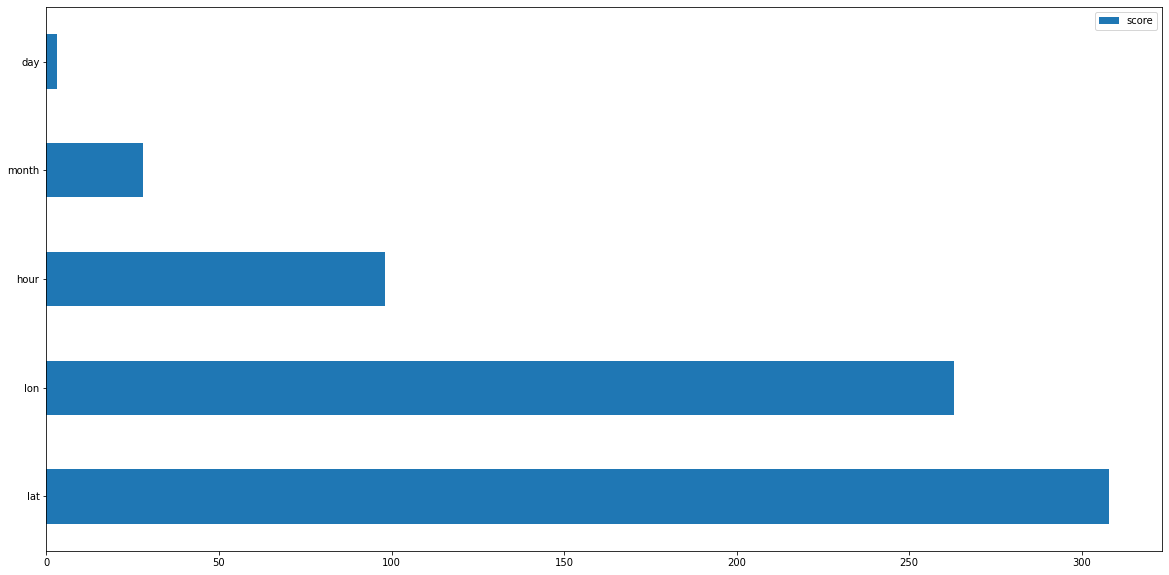

In [ ]:
feature_importants = baseline_model.get_booster().get_score(importance_type='weight')
keys = list(feature_importants.keys())
values = list(feature_importants.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10))

In [ ]:
# Что делаем там где инфы
# Интерактивная карта по значениям - https://geohackweek.github.io/ghw2018_web_portal_inlandwater_co2/InteractiveTimeSeries.html
# Не хватает мета инфы прошлого
# Видно переобучение + возможно работали с ликами

### Attempt 2
* Убрать лик времени
* Добавить мета инфу (прошлый предикт + инфо лайков/эмоций/и т.д.)

# Train set + meta info

In [ ]:
grouped_trainset = nice_trainset.groupby(['point', 'timestamp']).agg(
    likescount_max=pd.NamedAgg(column='likescount', aggfunc='max'),
    likescount_sum=pd.NamedAgg(column='likescount', aggfunc='sum'),
    #likescount_avg=pd.NamedAgg(column='likescount', aggfunc='mean'),

    commentscount_max=pd.NamedAgg(column='commentscount', aggfunc='max'),
    commentscount_sum=pd.NamedAgg(column='commentscount', aggfunc='sum'),
    #commentscount_avg=pd.NamedAgg(column='commentscount', aggfunc='mean'),

    symbols_cnt_max=pd.NamedAgg(column='symbols_cnt', aggfunc='max'),
    symbols_cnt_sum=pd.NamedAgg(column='symbols_cnt', aggfunc='sum'),
    #symbols_cnt_avg=pd.NamedAgg(column='symbols_cnt', aggfunc='mean'),

    words_cnt_max=pd.NamedAgg(column='words_cnt', aggfunc='max'),
    words_cnt_sum=pd.NamedAgg(column='words_cnt', aggfunc='sum'),
    #words_cnt_avg=pd.NamedAgg(column='words_cnt', aggfunc='mean'),

    hashtags_cnt_max=pd.NamedAgg(column='hashtags_cnt', aggfunc='max'),
    hashtags_cnt_sum=pd.NamedAgg(column='hashtags_cnt', aggfunc='sum'),
    #hashtags_cnt_avg=pd.NamedAgg(column='hashtags_cnt', aggfunc='mean'),

    mentions_cnt_max=pd.NamedAgg(column='mentions_cnt', aggfunc='max'),
    mentions_cnt_sum=pd.NamedAgg(column='mentions_cnt', aggfunc='sum'),
    #mentions_cnt_avg=pd.NamedAgg(column='mentions_cnt', aggfunc='mean'),

    links_cnt_max=pd.NamedAgg(column='links_cnt', aggfunc='max'),
    links_cnt_sum=pd.NamedAgg(column='links_cnt', aggfunc='sum'),
    #links_cnt_avg=pd.NamedAgg(column='links_cnt', aggfunc='mean'),
    
    emoji_cnt_max=pd.NamedAgg(column='emoji_cnt', aggfunc='max'),
    emoji_cnt_sum=pd.NamedAgg(column='emoji_cnt', aggfunc='sum'),
    #emoji_cnt_avg=pd.NamedAgg(column='emoji_cnt', aggfunc='mean'),

    publication=pd.NamedAgg(column='publication', aggfunc='sum'),
).reset_index()
grouped_trainset.head()

,point,timestamp,likescount_max,likescount_sum,commentscount_max,commentscount_sum,symbols_cnt_max,symbols_cnt_sum,words_cnt_max,words_cnt_sum,hashtags_cnt_max,hashtags_cnt_sum,mentions_cnt_max,mentions_cnt_sum,links_cnt_max,links_cnt_sum,emoji_cnt_max,emoji_cnt_sum,publication
0,0101000020E610000002A5EC7AB31D3E4097654065F8EA...,1574420400,31,31,3,3,270,270,24,24,5,5,1,1,0,0,0,0,1
1,0101000020E610000002A5EC7AB31D3E4097654065F8EA...,1574424000,37,37,4,4,358,358,31,31,4,4,0,0,0,0,1,1,1
2,0101000020E610000002A5EC7AB31D3E4097654065F8EA...,1574514000,34,34,0,0,119,119,7,7,4,4,0,0,0,0,0,0,1
3,0101000020E610000002A5EC7AB31D3E4097654065F8EA...,1574697600,45,45,2,2,244,244,16,16,4,4,1,1,0,0,0,0,1
4,0101000020E610000002A5EC7AB31D3E4097654065F8EA...,1574848800,42,42,2,2,242,242,18,18,4,4,0,0,0,0,1,1,1


In [ ]:
add_date_metainfo(grouped_trainset)
#grouped_trainset = grouped_trainset.set_index(grouped_trainset.date)
grouped_trainset.head()

,point,timestamp,likescount_max,likescount_sum,commentscount_max,commentscount_sum,symbols_cnt_max,symbols_cnt_sum,words_cnt_max,words_cnt_sum,...,links_cnt_max,links_cnt_sum,emoji_cnt_max,emoji_cnt_sum,publication,date,hour,day,month,year
0,0101000020E610000002A5EC7AB31D3E4097654065F8EA...,1574420400,31,31,3,3,270,270,24,24,...,0,0,0,0,1,2019-11-22 11:00:00,11,22,11,2019
1,0101000020E610000002A5EC7AB31D3E4097654065F8EA...,1574424000,37,37,4,4,358,358,31,31,...,0,0,1,1,1,2019-11-22 12:00:00,12,22,11,2019
2,0101000020E610000002A5EC7AB31D3E4097654065F8EA...,1574514000,34,34,0,0,119,119,7,7,...,0,0,0,0,1,2019-11-23 13:00:00,13,23,11,2019
3,0101000020E610000002A5EC7AB31D3E4097654065F8EA...,1574697600,45,45,2,2,244,244,16,16,...,0,0,0,0,1,2019-11-25 16:00:00,16,25,11,2019
4,0101000020E610000002A5EC7AB31D3E4097654065F8EA...,1574848800,42,42,2,2,242,242,18,18,...,0,0,1,1,1,2019-11-27 10:00:00,10,27,11,2019


In [ ]:
grouped_trainset.drop(['timestamp'], 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
valid_processed = valid.copy()
add_date_metainfo(valid_processed, 'hour')
valid_processed.head()

,hour,lat,lon,point,sum,error,date,day,month,year
0,9,59.926986,30.318141,0101000020E6100000202C93AD71513E4070B5CC78A7F6...,5,0.421402,2020-02-23 09:00:00,23,2,2020
1,19,59.924735,30.241784,0101000020E6100000C5FE0F8FE53D3E4033438EB75DF6...,14,0.310291,2020-02-20 19:00:00,20,2,2020
2,15,60.002300,30.295683,0101000020E6100000AB00D6E0B14B3E40CB88A75E4B00...,5,3.754735,2020-02-09 15:00:00,9,2,2020
3,17,59.935988,30.324878,0101000020E61000005DECCB372B533E40E4A1F770CEF7...,7,0.504735,2020-02-17 17:00:00,17,2,2020
4,5,59.933737,30.306912,0101000020E6100000669634C7914E3E407AB3D8B484F7...,14,1.554735,2020-02-27 05:00:00,27,2,2020


In [ ]:
valid_processed['publication'] = valid_processed['sum']
valid_processed.drop(['lat', 'lon', 'sum'], 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
grouped_trainset.columns

Index(['point', 'likescount_max', 'likescount_sum', 'commentscount_max',
       'commentscount_sum', 'symbols_cnt_max', 'symbols_cnt_sum',
       'words_cnt_max', 'words_cnt_sum', 'hashtags_cnt_max',
       'hashtags_cnt_sum', 'mentions_cnt_max', 'mentions_cnt_sum',
       'links_cnt_max', 'links_cnt_sum', 'emoji_cnt_max', 'emoji_cnt_sum',
       'publication', 'date', 'hour', 'day', 'month', 'year'],
      dtype='object')

In [ ]:
for col in grouped_trainset.columns:
  if col not in valid_processed:
    valid_processed[col] = 0

In [ ]:
for col in grouped_trainset.columns:
  if col not in valid_processed:
    print(col)

In [ ]:
valid_processed.head()

,hour,point,error,date,day,month,year,publication,likescount_max,likescount_sum,...,words_cnt_max,words_cnt_sum,hashtags_cnt_max,hashtags_cnt_sum,mentions_cnt_max,mentions_cnt_sum,links_cnt_max,links_cnt_sum,emoji_cnt_max,emoji_cnt_sum
0,9,0101000020E6100000202C93AD71513E4070B5CC78A7F6...,0.421402,2020-02-23 09:00:00,23,2,2020,5,0,0,...,0,0,0,0,0,0,0,0,0,0
1,19,0101000020E6100000C5FE0F8FE53D3E4033438EB75DF6...,0.310291,2020-02-20 19:00:00,20,2,2020,14,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0101000020E6100000AB00D6E0B14B3E40CB88A75E4B00...,3.754735,2020-02-09 15:00:00,9,2,2020,5,0,0,...,0,0,0,0,0,0,0,0,0,0
3,17,0101000020E61000005DECCB372B533E40E4A1F770CEF7...,0.504735,2020-02-17 17:00:00,17,2,2020,7,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0101000020E6100000669634C7914E3E407AB3D8B484F7...,1.554735,2020-02-27 05:00:00,27,2,2020,14,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
valid_processed.drop(['error'], 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
valid_publications = valid_processed['publication']
valid_processed['publication'] = 0 # To Avoid data leak in previous values

In [ ]:
full = pd.concat([grouped_trainset, valid_processed], axis=0, ignore_index=True)
full.head()

,point,likescount_max,likescount_sum,commentscount_max,commentscount_sum,symbols_cnt_max,symbols_cnt_sum,words_cnt_max,words_cnt_sum,hashtags_cnt_max,...,links_cnt_max,links_cnt_sum,emoji_cnt_max,emoji_cnt_sum,publication,date,hour,day,month,year
0,0101000020E610000002A5EC7AB31D3E4097654065F8EA...,31,31,3,3,270,270,24,24,5,...,0,0,0,0,1,2019-11-22 11:00:00,11,22,11,2019
1,0101000020E610000002A5EC7AB31D3E4097654065F8EA...,37,37,4,4,358,358,31,31,4,...,0,0,1,1,1,2019-11-22 12:00:00,12,22,11,2019
2,0101000020E610000002A5EC7AB31D3E4097654065F8EA...,34,34,0,0,119,119,7,7,4,...,0,0,0,0,1,2019-11-23 13:00:00,13,23,11,2019
3,0101000020E610000002A5EC7AB31D3E4097654065F8EA...,45,45,2,2,244,244,16,16,4,...,0,0,0,0,1,2019-11-25 16:00:00,16,25,11,2019
4,0101000020E610000002A5EC7AB31D3E4097654065F8EA...,42,42,2,2,242,242,18,18,4,...,0,0,1,1,1,2019-11-27 10:00:00,10,27,11,2019


In [ ]:
valid_processed.iloc[0]

hour                                                                 9
point                0101000020E6100000202C93AD71513E4070B5CC78A7F6...
date                                               2020-02-23 09:00:00
day                                                                 23
month                                                                2
year                                                              2020
publication                                                          0
likescount_max                                                       0
likescount_sum                                                       0
commentscount_max                                                    0
commentscount_sum                                                    0
symbols_cnt_max                                                      0
symbols_cnt_sum                                                      0
words_cnt_max                                                        0
words_

In [ ]:
full.iloc[len(grouped_trainset)]

point                0101000020E6100000202C93AD71513E4070B5CC78A7F6...
likescount_max                                                       0
likescount_sum                                                       0
commentscount_max                                                    0
commentscount_sum                                                    0
symbols_cnt_max                                                      0
symbols_cnt_sum                                                      0
words_cnt_max                                                        0
words_cnt_sum                                                        0
hashtags_cnt_max                                                     0
hashtags_cnt_sum                                                     0
mentions_cnt_max                                                     0
mentions_cnt_sum                                                     0
links_cnt_max                                                        0
links_

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
def add_rolling_meta(df, feature_tuple):
  """
  feature_tuple - array of tuples (name_of_field, tuple of range specs, agg func)
  """

  for name, specs, agg_func in tqdm(feature_tuple):
    for spec in specs:
      print(name, spec)
      rolling = df.groupby('point').rolling(spec, on='date', closed='left')[name]
      if agg_func == 'max':
        rolling = rolling.max()
      elif agg_func == 'mean':
        rolling = rolling.mean()
      elif agg_func == 'sum':
        rolling = rolling.sum()
      else:
        print(f'!WARNING: {agg_func} for {name} is not implemented. Continue..')
        continue
      df[f'{name}_{spec}'] = rolling.reset_index().fillna(0)[name]

In [ ]:
meta_rolling = [
    ('likescount_max', ('2H',  'D', '7D', '1000D'), 'max'),
    ('likescount_sum', ('2H',  'D', '7D', '1000D'), 'sum'),
    ('commentscount_max', ('2H',  'D', '7D', '1000D'), 'max'),
    ('commentscount_sum', ('2H',  'D', '7D', '1000D'), 'sum'),
    ('symbols_cnt_max', ('2H',  'D', '7D', '1000D'), 'max'),
    ('symbols_cnt_sum', ('2H',  'D', '7D', '1000D'), 'sum'),
    ('words_cnt_max', ('2H',  'D', '7D', '1000D'), 'max'),
    ('words_cnt_sum', ('2H',  'D', '7D', '1000D'), 'sum'),
    ('hashtags_cnt_max', ('2H',  'D', '7D', '1000D'), 'max'),
    ('hashtags_cnt_sum', ('2H',  'D', '7D', '1000D'), 'sum'),
    ('mentions_cnt_max', ('2H',  'D', '7D', '1000D'), 'max'),
    ('mentions_cnt_sum', ('2H',  'D', '7D', '1000D'), 'sum'),
    ('links_cnt_max', ('2H',  'D', '7D', '1000D'), 'max'),
    ('links_cnt_sum', ('2H',  'D', '7D', '1000D'), 'sum'),
    ('emoji_cnt_max', ('2H',  'D', '7D', '1000D'), 'max'),
    ('emoji_cnt_sum', ('2H',  'D', '7D', '1000D'), 'sum'),
    ('publication', ('2H',  'D', '7D', '1000D'), 'sum'),
]

In [ ]:
idx = len(grouped_trainset)

In [ ]:
del grouped_trainset
del nice_trainset
del train
del trainset

In [ ]:
add_rolling_meta(full, meta_rolling)

  0%|          | 0/17 [00:00<?, ?it/s]

likescount_max 2H
likescount_max D
likescount_max 7D
likescount_max 1000D
likescount_sum 2H
likescount_sum D
likescount_sum 7D
likescount_sum 1000D
commentscount_max 2H
commentscount_max D
commentscount_max 7D
commentscount_max 1000D
commentscount_sum 2H
commentscount_sum D
commentscount_sum 7D
commentscount_sum 1000D
symbols_cnt_max 2H
symbols_cnt_max D
symbols_cnt_max 7D
symbols_cnt_max 1000D
symbols_cnt_sum 2H
symbols_cnt_sum D
symbols_cnt_sum 7D
symbols_cnt_sum 1000D
words_cnt_max 2H
words_cnt_max D
words_cnt_max 7D
words_cnt_max 1000D
words_cnt_sum 2H
words_cnt_sum D
words_cnt_sum 7D
words_cnt_sum 1000D
hashtags_cnt_max 2H
hashtags_cnt_max D
hashtags_cnt_max 7D
hashtags_cnt_max 1000D
hashtags_cnt_sum 2H
hashtags_cnt_sum D
hashtags_cnt_sum 7D
hashtags_cnt_sum 1000D
mentions_cnt_max 2H
mentions_cnt_max D
mentions_cnt_max 7D
mentions_cnt_max 1000D
mentions_cnt_sum 2H
mentions_cnt_sum D
mentions_cnt_sum 7D
mentions_cnt_sum 1000D
links_cnt_max 2H
links_cnt_max D
links_cnt_max 7D
links_

In [ ]:
full.iloc[idx:].to_csv('/content/drive/MyDrive/ITMO/IndustryML/valid_processed.csv')

In [ ]:
valid_processed.to_csv('/content/drive/MyDrive/ITMO/IndustryML/valid_processed.csv')

In [ ]:
full.iloc[:idx].to_csv('/content/drive/MyDrive/ITMO/IndustryML/train_with_meta.csv')

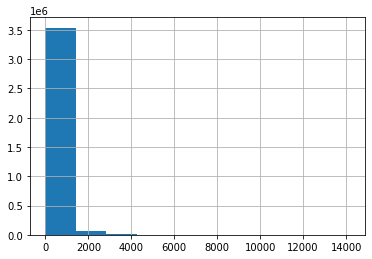

In [ ]:
full['publication_7D'].hist()

In [ ]:
train = full.iloc[:idx]

In [ ]:
full.head()

,point,likescount_max,likescount_sum,commentscount_max,commentscount_sum,symbols_cnt_max,symbols_cnt_sum,words_cnt_max,words_cnt_sum,hashtags_cnt_max,...,emoji_cnt_max_7D,emoji_cnt_max_1000D,emoji_cnt_sum_2H,emoji_cnt_sum_D,emoji_cnt_sum_7D,emoji_cnt_sum_1000D,publication_2H,publication_D,publication_7D,publication_1000D
0,0101000020E610000002A5EC7AB31D3E4097654065F8EA...,31,31,3,3,270,270,24,24,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0101000020E610000002A5EC7AB31D3E4097654065F8EA...,37,37,4,4,358,358,31,31,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0101000020E610000002A5EC7AB31D3E4097654065F8EA...,34,34,0,0,119,119,7,7,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0101000020E610000002A5EC7AB31D3E4097654065F8EA...,45,45,2,2,244,244,16,16,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0101000020E610000002A5EC7AB31D3E4097654065F8EA...,42,42,2,2,242,242,18,18,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# XGBoost testing

In [ ]:
import pandas as pd
import gc

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/ITMO/IndustryML/train_with_meta.csv', index_col=0)
train.head()

,point,likescount_max,likescount_sum,commentscount_max,commentscount_sum,symbols_cnt_max,symbols_cnt_sum,words_cnt_max,words_cnt_sum,hashtags_cnt_max,...,emoji_cnt_max_7D,emoji_cnt_max_1000D,emoji_cnt_sum_2H,emoji_cnt_sum_D,emoji_cnt_sum_7D,emoji_cnt_sum_1000D,publication_2H,publication_D,publication_7D,publication_1000D
0,0101000020E610000002A5EC7AB31D3E4097654065F8EA...,31,31,3,3,270,270,24,24,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0101000020E610000002A5EC7AB31D3E4097654065F8EA...,37,37,4,4,358,358,31,31,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0101000020E610000002A5EC7AB31D3E4097654065F8EA...,34,34,0,0,119,119,7,7,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0101000020E610000002A5EC7AB31D3E4097654065F8EA...,45,45,2,2,244,244,16,16,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0101000020E610000002A5EC7AB31D3E4097654065F8EA...,42,42,2,2,242,242,18,18,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
point_to_geo = raw_train.groupby(['point']).max().transpose().to_csv('/content/drive/MyDrive/ITMO/IndustryML/contant_to_geo', index=False)

In [ ]:
p2geo_dict = pd.read_csv('/content/drive/MyDrive/ITMO/IndustryML/contant_to_geo').transpose()
p2geo_dict = p2geo_dict.rename(columns={0: "lat", 1: "lon"})
p2geo_dict.head()

,lat,lon
0101000020E610000000000000000000000000000000000000,0.000000,0.000000
0101000020E610000002A5EC7AB31D3E4097654065F8EA4D40,59.835705,30.116020
0101000020E610000002BF48199F3F3E400A41C338F1F64D40,59.929237,30.248521
0101000020E610000002BF48199F3F3E400A721DB144FC4D40,59.970846,30.248521
0101000020E610000002BF48199F3F3E400B9A5B3306034E40,60.023627,30.248521


In [ ]:
def point_to_geo(row):
  geo = p2geo_dict[row['point']]
  row['lat'] = float(geo[0])
  row['lon'] = float(geo[1])
  return row

In [ ]:
geo_df = train[['point']].apply(point_to_geo, axis=1)
geo_df.head()

In [ ]:
train = train.join(p2geo_dict, on='point')

In [ ]:
train.drop(['point'], axis=1, inplace=True)

# Long-meta

In [ ]:
long_columns = [item for item in train.columns if '1000D' in item or 'day' == item or 'hour' == item or 'month' == item or 'lat' == item or 'lon' == item]

In [ ]:
long_columns

['hour',
 'day',
 'month',
 'likescount_max_1000D',
 'likescount_sum_1000D',
 'commentscount_max_1000D',
 'commentscount_sum_1000D',
 'symbols_cnt_max_1000D',
 'symbols_cnt_sum_1000D',
 'words_cnt_max_1000D',
 'words_cnt_sum_1000D',
 'hashtags_cnt_max_1000D',
 'hashtags_cnt_sum_1000D',
 'mentions_cnt_max_1000D',
 'mentions_cnt_sum_1000D',
 'links_cnt_max_1000D',
 'links_cnt_sum_1000D',
 'emoji_cnt_max_1000D',
 'emoji_cnt_sum_1000D',
 'publication_1000D',
 'lat',
 'lon']

In [ ]:
train = train[long_columns + ['publication']]
train.head()

,hour,day,month,likescount_max_1000D,likescount_sum_1000D,commentscount_max_1000D,commentscount_sum_1000D,symbols_cnt_max_1000D,symbols_cnt_sum_1000D,words_cnt_max_1000D,...,mentions_cnt_max_1000D,mentions_cnt_sum_1000D,links_cnt_max_1000D,links_cnt_sum_1000D,emoji_cnt_max_1000D,emoji_cnt_sum_1000D,publication_1000D,lat,lon,publication
0,11,22,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.835705,30.11602,1
1,12,22,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.835705,30.11602,1
2,13,23,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.835705,30.11602,1
3,16,25,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.835705,30.11602,1
4,10,27,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.835705,30.11602,1


In [ ]:
train.to_csv('/content/drive/MyDrive/ITMO/IndustryML/small_train-v3-long.csv', index=False)

## Decorelation

In [ ]:
y = train['publication']
train.drop(['publication'], axis=1, inplace=True)
#train.drop(['point'], axis=1, inplace=True)
#train.drop(['Unnamed: 0'], axis=1, inplace=True)
train.drop(['date'], axis=1, inplace=True)

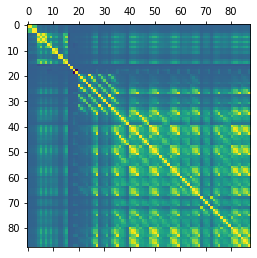

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(train.corr())
plt.show()

In [ ]:
corr = train.corr()

In [ ]:
corr.head()

,likescount_max,likescount_sum,commentscount_max,commentscount_sum,symbols_cnt_max,symbols_cnt_sum,words_cnt_max,words_cnt_sum,hashtags_cnt_max,hashtags_cnt_sum,...,emoji_cnt_max_7D,emoji_cnt_max_1000D,emoji_cnt_sum_2H,emoji_cnt_sum_D,emoji_cnt_sum_7D,emoji_cnt_sum_1000D,publication_2H,publication_D,publication_7D,publication_1000D
likescount_max,1.000000,0.996778,0.581591,0.575450,0.026371,0.052896,0.026916,0.050097,0.017225,0.041132,...,0.012153,0.010085,0.016533,0.024295,0.024706,0.015980,0.018812,0.026194,0.026917,0.017971
likescount_sum,0.996778,1.000000,0.583991,0.583547,0.041081,0.092835,0.042031,0.087402,0.031435,0.077663,...,0.023241,0.018983,0.034152,0.049425,0.050768,0.032411,0.040090,0.053522,0.056135,0.037577
commentscount_max,0.581591,0.583991,1.000000,0.994607,0.067980,0.107646,0.070750,0.107010,0.030265,0.068554,...,0.028117,0.023216,0.041474,0.056837,0.058066,0.040870,0.040222,0.051421,0.053552,0.039892
commentscount_sum,0.575450,0.583547,0.994607,1.000000,0.089667,0.165492,0.093247,0.162558,0.049092,0.115317,...,0.043139,0.035437,0.066863,0.092545,0.094767,0.064816,0.068998,0.088065,0.092297,0.066803
symbols_cnt_max,0.026371,0.041081,0.067980,0.089667,1.000000,0.732535,0.967090,0.759695,0.399191,0.363733,...,0.156472,0.124253,0.175960,0.232332,0.242024,0.202114,0.166193,0.202403,0.215794,0.179169


In [ ]:
gc.collect()

193

In [ ]:
high_cor = set()
for i, row in corr.iterrows():
  for key, val in row.items():
    if i != key and val > 0.6:
      high_cor.add((i, key))


In [ ]:
del corr
len(high_cor)

64

In [ ]:
gc.collect()

132

In [ ]:
i = 0
for one, two in high_cor:
  if one in train and two in train:
    print(one, two, i)
    train.drop([two], axis=1, inplace=True)
    gc.collect()
    i += 1

words_cnt_max_7D hashtags_cnt_max_7D 0
mentions_cnt_max_D mentions_cnt_max_7D 1
emoji_cnt_max_D emoji_cnt_max_7D 2
publication_2H emoji_cnt_sum_D 3
likescount_max_D commentscount_max_D 4
likescount_max_1000D commentscount_max_1000D 5
symbols_cnt_sum hashtags_cnt_sum 6
hashtags_cnt_max_D words_cnt_max_7D 7
emoji_cnt_sum emoji_cnt_max 8
symbols_cnt_sum emoji_cnt_sum 9
symbols_cnt_max_D hashtags_cnt_max_D 10
likescount_sum_7D commentscount_max_7D 11
mentions_cnt_sum_7D likescount_sum_7D 12
emoji_cnt_max_2H words_cnt_max_2H 13
likescount_max_2H commentscount_max_2H 14
links_cnt_sum_7D mentions_cnt_sum_7D 15
links_cnt_sum_7D links_cnt_sum_D 16
mentions_cnt_sum_2H mentions_cnt_max_2H 17
symbols_cnt_sum_2H publication_2H 18
words_cnt_max symbols_cnt_sum 19


In [ ]:
train.head()

,likescount_max,commentscount_max,words_cnt_max,hashtags_cnt_max,mentions_cnt_max,links_cnt_sum,hour,day,month,year,...,links_cnt_max_D,links_cnt_max_7D,links_cnt_max_1000D,links_cnt_sum_7D,links_cnt_sum_1000D,emoji_cnt_max_2H,emoji_cnt_max_D,emoji_cnt_max_1000D,lat,lon
0,31,3,24,5,1,0,11,22,11,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.835705,30.11602
1,37,4,31,4,0,0,12,22,11,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.835705,30.11602
2,34,0,7,4,0,0,13,23,11,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.835705,30.11602
3,45,2,16,4,1,0,16,25,11,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.835705,30.11602
4,42,2,18,4,0,0,10,27,11,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.835705,30.11602


In [ ]:
train['publication'] = y
train.to_csv('/content/drive/MyDrive/ITMO/IndustryML/small_train-v2.csv', index=False)

In [ ]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/ITMO/IndustryML/small_train-v2.csv')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor

In [ ]:
baseline_model = XGBRegressor()

In [ ]:
y = train['publication']
train.drop(['publication'], axis=1, inplace=True)


In [ ]:
train.drop(['likescount_sum_1000D', 'publication_1000D'], axis=1, inplace=True)

In [ ]:
train = train[['lat', 'lon', 'hour', 'day', 'month', 'likescount_max']]

In [ ]:
y_train, y_test = y[train['month'] <= 11], y[train['month'] > 11]
train_train, train_test = train[train['month'] <= 11], train[train['month'] > 11] 

In [ ]:
len(train_train)

3318761

In [ ]:
len(y_train)

3318761

In [ ]:
def custom_loss(true_val, pred_val):
  return abs(pred_val-true_val)/pred_val


In [ ]:
baseline_model = XGBRegressor(max_depth=2)
baseline_model.fit(train_train, y_train)

[10:07:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=2)

In [ ]:
import gc
import numpy as np
gc.collect()

88

In [ ]:
import pickle
baseline_model = pickle.load(open('/content/drive/MyDrive/ITMO/IndustryML/bmodel-5d-only_likes_count.pkt', 'rb'))

[06:40:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
import numpy as np
train_preds = baseline_model.predict(train_train)
test_preds = baseline_model.predict(train_test)

print('TRAIN: mae {}, mse {}, r2 {}, custom_loss {}'.format(mae(y_train, train_preds),
                                                        mse(y_train, train_preds),
                                                       r2(y_train, train_preds),
                                                        np.mean(custom_loss(y_train, train_preds))))

print('TEST: mae {}, mse {}, r2 {}, custom_loss {}'.format(mae(y_test, test_preds),
                                                        mse(y_test, test_preds),
                                                        r2(y_test, test_preds),
                                                        np.mean(custom_loss(y_test, test_preds))))

TRAIN: mae 1.5075873710114254, mse 13.993538696140197, r2 0.1863403338162406, custom_loss 0.5478042364120483
TEST: mae 1.426212834556737, mse 15.128152864159992, r2 0.1784225719783501, custom_loss 0.5460772492139474


In [ ]:
import pickle

In [ ]:
pickle.dump(baseline_model, open('/content/drive/MyDrive/ITMO/IndustryML/bmodel-5d-only_likes_count.pkt', 'wb'))

In [ ]:
train_train.to_csv('/content/drive/MyDrive/ITMO/IndustryML/small_train.csv')

In [ ]:
val = pd.read_csv('/content/drive/MyDrive/ITMO/IndustryML/valid_processed.csv')

In [ ]:
val = val.join(p2geo_dict, on='point')

In [ ]:
val.to_csv('/content/drive/MyDrive/ITMO/IndustryML/valid_processed.csv', index=False)

In [ ]:
val.drop(['Unnamed: 0.1'], axis=1, inplace=True)

In [ ]:
y_val = val['publication']

In [ ]:
cols = train_train.columns

In [ ]:
x_val = val[cols]

In [ ]:
x_val.head()

,lat,lon,hour,day,month,likescount_max
0,59.926986,30.318141,9,23,2,320.097351
1,59.924735,30.241784,19,20,2,241.872940
2,60.002300,30.295683,15,9,2,187.095978
3,59.935988,30.324878,17,17,2,292.758057
4,59.933737,30.306912,5,27,2,334.422516


In [ ]:
val_pred = baseline_model.predict(x_val)

In [ ]:
print('TEST: mae {}, mse {}, r2 {}, custom_loss {}'.format(mae(y_val, val_pred),
                                                        mse(y_val, val_pred),
                                                        r2(y_val, val_pred),
                                                        np.mean(custom_loss(y_val, val_pred))))

TEST: mae 5.683021659407192, mse 69.32810361181309, r2 -0.6908240999259343, custom_loss 1.4233923013557674


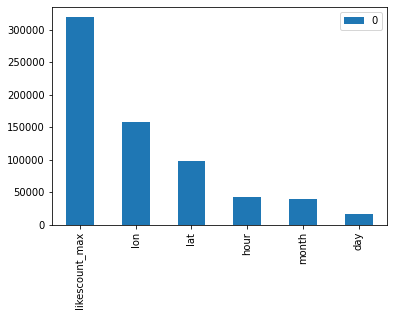

In [ ]:
f_imp = baseline_model.get_booster().get_score(importance_type='gain')
importance_df = pd.DataFrame.from_dict(data=f_imp, 
                                       orient='index')
importance_df.plot.bar()

## Predicting meta

In [ ]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/ITMO/IndustryML/small_train-v2.csv')

In [ ]:
train.head()

,likescount_max,commentscount_max,words_cnt_max,hashtags_cnt_max,mentions_cnt_max,links_cnt_sum,hour,day,month,year,...,links_cnt_max_7D,links_cnt_max_1000D,links_cnt_sum_7D,links_cnt_sum_1000D,emoji_cnt_max_2H,emoji_cnt_max_D,emoji_cnt_max_1000D,lat,lon,publication
0,31,3,24,5,1,0,11,22,11,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.835705,30.11602,1
1,37,4,31,4,0,0,12,22,11,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.835705,30.11602,1
2,34,0,7,4,0,0,13,23,11,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.835705,30.11602,1
3,45,2,16,4,1,0,16,25,11,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.835705,30.11602,1
4,42,2,18,4,0,0,10,27,11,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.835705,30.11602,1


In [ ]:
y = train['likescount_max']
x = train[['month', 'day', 'hour', 'lat', 'lon']]

In [ ]:
y_train, y_test = y[x['month'] <= 11], y[x['month'] > 11]
x_train, x_test = x[x['month'] <= 11], x[x['month'] > 11]

In [ ]:
# likes count
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor

likes_model = XGBRegressor(max_depth=2)
likes_model.fit(x, y)

[06:41:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=2)

In [ ]:
pickle.dump(likes_model, open('/content/drive/MyDrive/ITMO/IndustryML/likes_model.pkt', 'wb'))

In [ ]:
import numpy as np
y_pred = likes_model.predict(x_test)
print('TEST: mae {}, mse {}, r2 {}, custom_loss {}'.format(mae(y_test, y_pred),
                                                        mse(y_test, y_pred),
                                                        r2(y_test, y_pred),
                                                        np.mean(custom_loss(y_test, y_pred))))

TEST: mae 179.96236299240525, mse 903195.7468574224, r2 0.004890077905321588, custom_loss 1.0947520236318977


In [ ]:
val_values = likes_model.predict(val[['month', 'day', 'hour', 'lat', 'lon']])

In [ ]:
val['likescount_max'] = val_values

In [ ]:
train.head()

,likescount_max,commentscount_max,words_cnt_max,hashtags_cnt_max,mentions_cnt_max,links_cnt_sum,hour,day,month,year,...,links_cnt_max_7D,links_cnt_max_1000D,links_cnt_sum_7D,links_cnt_sum_1000D,emoji_cnt_max_2H,emoji_cnt_max_D,emoji_cnt_max_1000D,lat,lon,publication
0,31,3,24,5,1,0,11,22,11,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.835705,30.11602,1
1,37,4,31,4,0,0,12,22,11,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.835705,30.11602,1
2,34,0,7,4,0,0,13,23,11,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.835705,30.11602,1
3,45,2,16,4,1,0,16,25,11,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.835705,30.11602,1
4,42,2,18,4,0,0,10,27,11,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.835705,30.11602,1


# Test

In [ ]:
import pandas as pd

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/ITMO/IndustryML/test.csv')

In [ ]:
test_df.head()

,hour,lat,lon,point,sum,error
0,1582711200,59.934863,30.331616,0101000020E61000009BAC04C2E4543E40DB251193A9F7...,7,0.370265
1,1581937200,59.940488,30.329370,0101000020E6100000DBC1F19351543E4006FC5DE561F8...,6,0.754735
2,1581523200,59.905597,30.297929,0101000020E61000006AEBE80E454C3E407F614299EAF3...,5,3.754735
3,1581512400,59.921359,30.356319,0101000020E6100000CFC2D4BC375B3E401FBF4913EFF5...,16,4.088069
4,1581771600,59.939363,30.315895,0101000020E61000006141807FDE503E40A554BF083DF8...,10,2.088069


In [ ]:
test_df = add_date_metainfo(test_df, 'hour')

In [ ]:
len(test_df)

700

In [ ]:
test_df.drop(['lat', 'lon'], axis=1, inplace=True)
test_df.join(p2geo_dict, on='point')
test_df.head()

,hour,point,sum,error,date,day,month,year
0,10,0101000020E61000009BAC04C2E4543E40DB251193A9F7...,7,0.370265,2020-02-26 10:00:00,26,2,2020
1,11,0101000020E6100000DBC1F19351543E4006FC5DE561F8...,6,0.754735,2020-02-17 11:00:00,17,2,2020
2,16,0101000020E61000006AEBE80E454C3E407F614299EAF3...,5,3.754735,2020-02-12 16:00:00,12,2,2020
3,13,0101000020E6100000CFC2D4BC375B3E401FBF4913EFF5...,16,4.088069,2020-02-12 13:00:00,12,2,2020
4,13,0101000020E61000006141807FDE503E40A554BF083DF8...,10,2.088069,2020-02-15 13:00:00,15,2,2020


In [ ]:
len(test_df)

700

In [ ]:
test_df.drop(['point', 'error', 'date'], axis=1, inplace=True)
test_df = test_df.rename(columns={'sum': 'publication'})

In [ ]:
test_df.head()

,hour,lat,lon,publication,day,month,year
0,10,59.934863,30.331616,7,26,2,2020
1,11,59.940488,30.329370,6,17,2,2020
2,16,59.905597,30.297929,5,12,2,2020
3,13,59.921359,30.356319,16,12,2,2020
4,13,59.939363,30.315895,10,15,2,2020


In [ ]:
test_df.to_csv('/content/drive/MyDrive/ITMO/IndustryML/test_clean.csv', index=False)

In [ ]:
test_values = likes_model.predict(test_df[['month', 'day', 'hour', 'lat', 'lon']])

In [ ]:
test_df['likescount_max'] = test_values

In [ ]:
y_val = test_df['publication']
x_val = test_df[['lat', 'lon', 'hour', 'day', 'month', 'likescount_max']]

In [ ]:
test_pred = baseline_model.predict(x_val)

In [ ]:
import numpy as np
print('TEST: mae {}, mse {}, r2 {}, custom_loss {}'.format(mae(y_val, test_pred),
                                                        mse(y_val, test_pred),
                                                        r2(y_val, test_pred),
                                                        np.mean(custom_loss(y_val, test_pred))))

TEST: mae 5.520257456983839, mse 67.62107838140736, r2 -0.6376771137553832, custom_loss 1.3981280513972933


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.bar(['custom loss', 'mae'], [])